In [1]:
import numpy as np 
from emanu import util as UT
from emanu import obvs as Obvs
from pyspectrum import plots as ePlots

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.colors import SymLogNorm
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
kf = (2*np.pi)/1000.

In [4]:
def readB123(mneut, i, nzbin, BorQ='Q'): 
    ''' wrapper for Obvs.B123_halo
    '''
    bk_kwargs = {'Lbox': 1000., 'zspace': False, 'mh_min': 3200., 'Ngrid': 360, 'Nmax': 40, 'Ncut': 3, 'step': 3}
    if isinstance(i, int):         
        i_k, j_k, l_k, B123, Q123, cnts, k_f = Obvs.B123_halo(mneut, i, nzbin, **bk_kwargs)
    elif isinstance(i, (list, np.ndarray)):
        i_k, j_k, l_k, B123, Q123, cnts = [], [], [], [], [], []
        for ii, _i in enumerate(i): 
            i_k_i, j_k_i, l_k_i, B123_i, Q123_i, cnts_i, _ = Obvs.B123_halo(mneut, _i, nzbin, **bk_kwargs)
            i_k.append(i_k_i)
            j_k.append(j_k_i)
            l_k.append(l_k_i)
            B123.append(B123_i)
            Q123.append(Q123_i)
            cnts.append(cnts_i)
        i_k = np.average(i_k, axis=0)
        j_k = np.average(j_k, axis=0)
        l_k = np.average(l_k, axis=0)
        B123 = np.average(B123, axis=0)
        Q123 = np.average(Q123, axis=0)
        cnts = np.average(cnts, axis=0)
        
    if BorQ == 'B': 
        return i_k, j_k, l_k, (2*np.pi)**6 * B123 / kf**6, cnts
    elif BorQ == 'Q': 
        return i_k, j_k, l_k, Q123, cnts

In [5]:
def readB123_sigma8(sig8, i, nzbin, BorQ='Q'): 
    ''' wrapper for Obvs.B123_halo
    '''
    bk_kwargs = {'Lbox': 1000., 'zspace': False, 'mh_min': 3200., 'Ngrid': 360, 'Nmax': 40, 'Ncut': 3, 'step': 3}
    if isinstance(i, int):         
        i_k, j_k, l_k, B123, Q123, cnts, k_f = Obvs.B123_halo_sigma8(sig8, i, nzbin, **bk_kwargs) 
    elif isinstance(i, (list, np.ndarray)):
        i_k, j_k, l_k, B123, Q123, cnts = [], [], [], [], [], []
        for ii, _i in enumerate(i): 
            i_k_i, j_k_i, l_k_i, B123_i, Q123_i, cnts_i, _ = Obvs.B123_halo_sigma8(sig8, _i, nzbin, **bk_kwargs)
            i_k.append(i_k_i)
            j_k.append(j_k_i)
            l_k.append(l_k_i)
            B123.append(B123_i)
            Q123.append(Q123_i)
            cnts.append(cnts_i)
        i_k = np.average(i_k, axis=0)
        j_k = np.average(j_k, axis=0)
        l_k = np.average(l_k, axis=0)
        B123 = np.average(B123, axis=0)
        Q123 = np.average(Q123, axis=0)
        cnts = np.average(cnts, axis=0)
        
    if BorQ == 'B': 
        return i_k, j_k, l_k, (2*np.pi)**6 * B123 / kf**6, cnts
    elif BorQ == 'Q': 
        return i_k, j_k, l_k, Q123, cnts

In [6]:
def dB123_mneut(mneut, sig8, i, nzbin, BorQ='Q'): 
    ''' impact of only mneut on B/Q123
    '''
    b123_kwargs = {'Lbox': 1000., 'zspace': False, 'mh_min': 3200., 'Ngrid': 360, 'Nmax': 40, 'Ncut': 3, 'step': 3}
    if isinstance(i, int):         
        i_k, j_k, l_k, B123, Q123, cnts, _ = Obvs.B123_halo(mneut, i, nzbin, **b123_kwargs)
        _, _, _, B123sig8, Q123sig8, _, _ = Obvs.B123_halo_sigma8(sig8, i, nzbin, **b123_kwargs)
        dB123 = B123 - B123sig8
        dQ123 = Q123 - Q123sig8
    elif isinstance(i, (list, np.ndarray)):
        i_k, j_k, l_k, dB123, dQ123, cnts = [], [], [], [], [], [] 
        for ii, _i in enumerate(i): 
            i_k_i, j_k_i, l_k_i, B123_i, Q123_i, cnts_i, _ = Obvs.B123_halo(mneut, _i, nzbin, **b123_kwargs)
            _, _, _, B123sig8_i, Q123sig8_i, _, _ = Obvs.B123_halo_sigma8(sig8, _i, nzbin, **b123_kwargs)
            
            dB123_i = B123_i - B123sig8_i
            dQ123_i = Q123_i - Q123sig8_i

            i_k.append(i_k_i)
            j_k.append(j_k_i)
            l_k.append(l_k_i)
            dB123.append(dB123_i)
            dQ123.append(dQ123_i)
            cnts.append(cnts_i)
        i_k = np.average(i_k, axis=0)
        j_k = np.average(j_k, axis=0)
        l_k = np.average(l_k, axis=0)
        dB123 = np.average(dB123, axis=0)
        dQ123 = np.average(dQ123, axis=0)
        cnts = np.average(cnts, axis=0)
        
    if BorQ == 'B': 
        return i_k, j_k, l_k, (2*np.pi)**6 * dB123 / kf**6, cnts
    elif BorQ == 'Q': 
        return i_k, j_k, l_k, dQ123, cnts

In [7]:
nbin = 50
x_bins = np.linspace(0., 1., nbin+1)
y_bins = np.linspace(0.5, 1., (nbin//2) + 1) 

nreals = range(1,37)

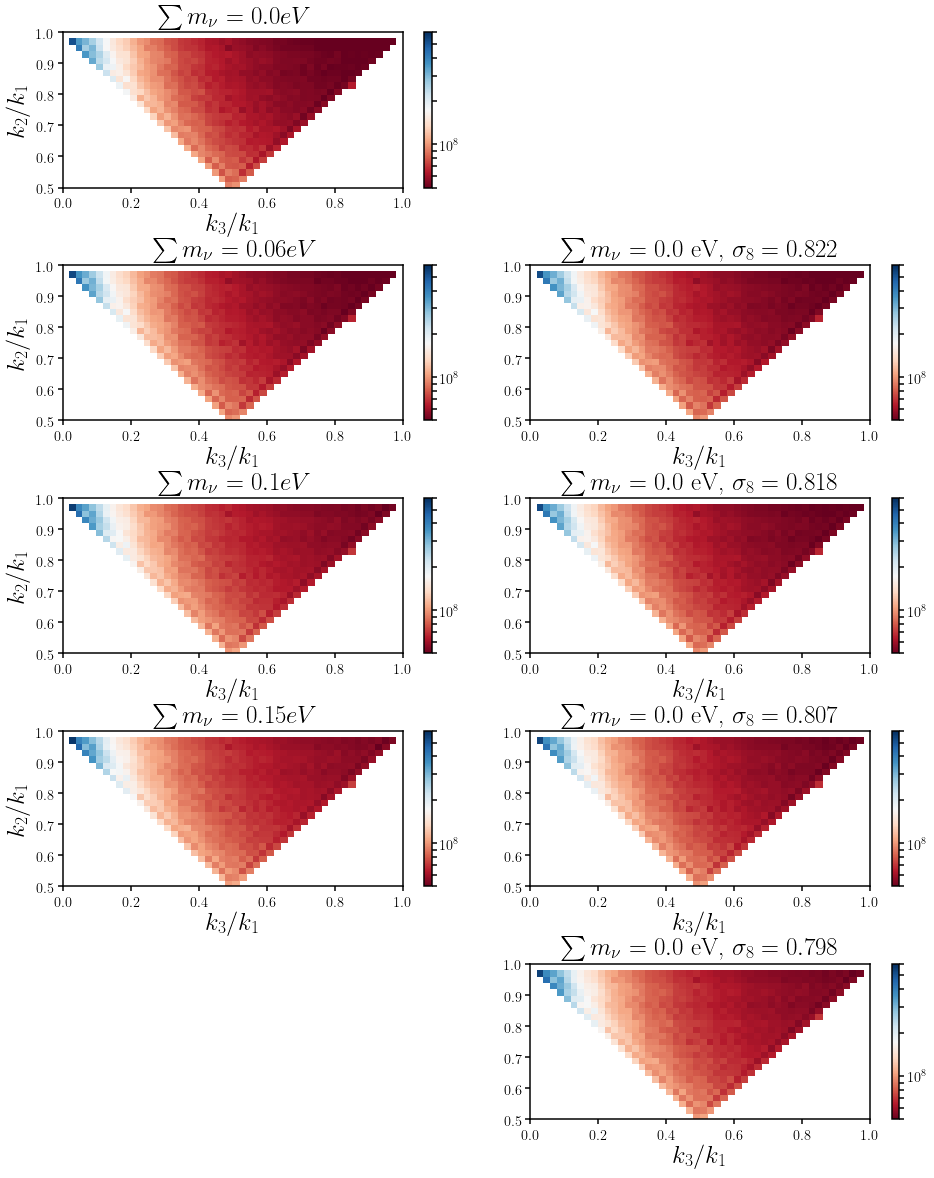

In [8]:
fig = plt.figure(figsize=(16,20))
for i, mneut, sig8 in zip(range(5), [0.0, 0.06, 0.1, 0.15, None], [None, 0.822, 0.818, 0.807, 0.798]): 
    if mneut is not None: 
        sub = fig.add_subplot(5,2,2*i+1)
        i_k, j_k, l_k, BQ123, cnts = readB123(mneut, nreals, 4, BorQ='B')

        BQgrid = ePlots._BorQgrid(l_k/i_k, j_k/i_k, BQ123, cnts, x_bins, y_bins)
        bplot = sub.pcolormesh(x_bins, y_bins, BQgrid.T, 
                            norm=LogNorm(vmin=5e7, vmax=6e8), cmap='RdBu') 
        cbar = plt.colorbar(bplot, orientation='vertical')

        sub.set_title(r'$\sum m_\nu ='+str(mneut)+'eV$', fontsize=25)
        sub.set_xlabel('$k_3/k_1$', fontsize=25)
        sub.set_ylabel('$k_2/k_1$', fontsize=25)

    if sig8 is not None: 
        sub = fig.add_subplot(5,2,2*i+2)
        i_k, j_k, l_k, BQ123, cnts = readB123_sigma8(sig8, range(1,26), 4, BorQ='B')
        BQgrid = ePlots._BorQgrid(l_k/i_k, j_k/i_k, BQ123, cnts, x_bins, y_bins)
        bplot = sub.pcolormesh(x_bins, y_bins, BQgrid.T, 
                        norm=LogNorm(vmin=5e7, vmax=6e8), cmap='RdBu') 
        cbar = plt.colorbar(bplot, orientation='vertical')
        sub.set_title(r'$\sum m_\nu = 0.0$ eV, $\sigma_8='+str(sig8)+'$', fontsize=25)
        sub.set_xlabel('$k_3/k_1$', fontsize=25)
fig.subplots_adjust(wspace=0.1, hspace=0.5)

In [15]:
i_k, j_k, l_k, BQ123, cnts = readB123(0.0, nreals, 4, BorQ='B')
BQ123_0 = BQ123

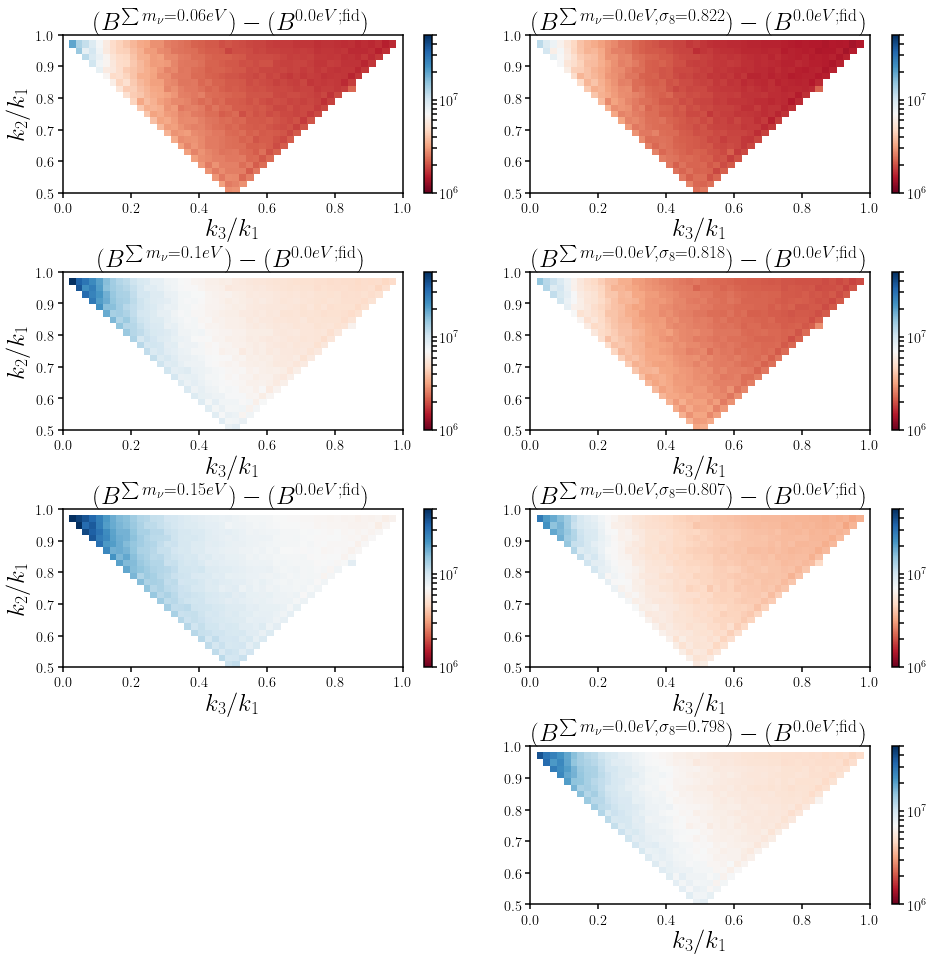

In [16]:
fig = plt.figure(figsize=(16,16))
for i, mneut, sig8 in zip(range(5), [0.0, 0.06, 0.1, 0.15, None], [None, 0.822, 0.818, 0.807, 0.798]): 
    if i > 0: 
        if mneut is not None: 
            i_k, j_k, l_k, BQ123, cnts = readB123(mneut, nreals, 4, BorQ='B')
            sub = fig.add_subplot(4,2,2*i-1)
            BQgrid = ePlots._BorQgrid(l_k/i_k, j_k/i_k, BQ123-BQ123_0, cnts, x_bins, y_bins)
            bplot = sub.pcolormesh(x_bins, y_bins, BQgrid.T, 
                            norm=LogNorm(vmin=1e6, vmax=5e7), cmap='RdBu') 
            cbar = plt.colorbar(bplot, orientation='vertical')
            sub.set_title(r'$(B^{\sum m_\nu ='+str(mneut)+r'eV}) - (B^{0.0eV;\mathrm{fid}})$', fontsize=25) 
            sub.set_xlabel('$k_3/k_1$', fontsize=25)
            sub.set_ylabel('$k_2/k_1$', fontsize=25)
    
        if sig8 is not None: 
            i_k, j_k, l_k, BQ123, cnts = readB123_sigma8(sig8, nreals, 4, BorQ='B')
            sub = fig.add_subplot(4,2,2*i)
            BQgrid = ePlots._BorQgrid(l_k/i_k, j_k/i_k, BQ123-BQ123_0, cnts, x_bins, y_bins)
            bplot = sub.pcolormesh(x_bins, y_bins, BQgrid.T, 
                            norm=LogNorm(vmin=1e6, vmax=5e7), cmap='RdBu') 
            cbar = plt.colorbar(bplot, orientation='vertical')

            sub.set_title(r'$(B^{\sum m_\nu = 0.0 eV, \sigma_8='+str(sig8)+'}) - (B^{0.0eV;\mathrm{fid}})$', fontsize=25)
            sub.set_xlabel('$k_3/k_1$', fontsize=25)
fig.subplots_adjust(wspace=0.1, hspace=0.5)

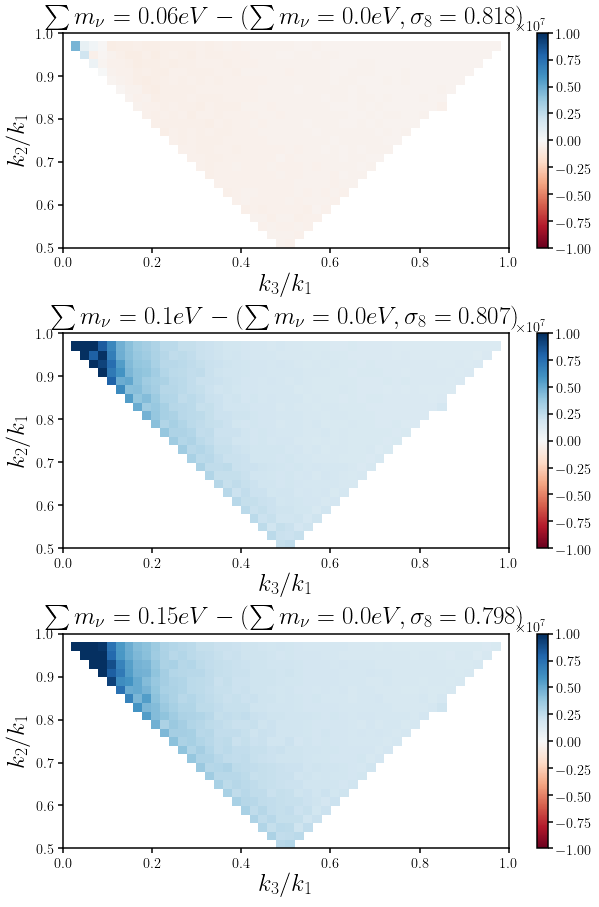

In [10]:
fig = plt.figure(figsize=(10,15))
for i, mneut, sig8 in zip(range(4), [0.06, 0.1, 0.15], [0.818, 0.807, 0.798]): 
    i_k, j_k, l_k, dBQ123, cnts = dB123_mneut(mneut, sig8, nreals, 4, BorQ='B')
    
    sub = fig.add_subplot(3,1,i+1)
    dBQgrid = ePlots._BorQgrid(l_k/i_k, j_k/i_k, dBQ123, cnts, x_bins, y_bins)
    bplot = plt.pcolormesh(x_bins, y_bins, dBQgrid.T, vmin=-1e7, vmax=1e7, cmap='RdBu') #norm=SymLogNorm(linthresh=1e7, linscale=1e7,vmin=-1e7, vmax=1e7), cmap='RdBu') 
    cbar = plt.colorbar(bplot, orientation='vertical')
    sub.set_title(r'$\sum m_\nu ='+str(mneut)+r'eV - (\sum m_\nu = 0.0 eV, \sigma_8='+str(sig8)+')$', fontsize=25)

    sub.set_xlabel('$k_3/k_1$', fontsize=25)
    sub.set_ylabel('$k_2/k_1$', fontsize=25)
fig.subplots_adjust(hspace=0.4)

In [31]:
klim = ((i_k * kf <= 0.5) & (i_k * kf >= 0.03) & 
        (j_k * kf <= 0.5) & (j_k * kf >= 0.03) & 
        (l_k * kf <= 0.5) & (l_k * kf >= 0.03))

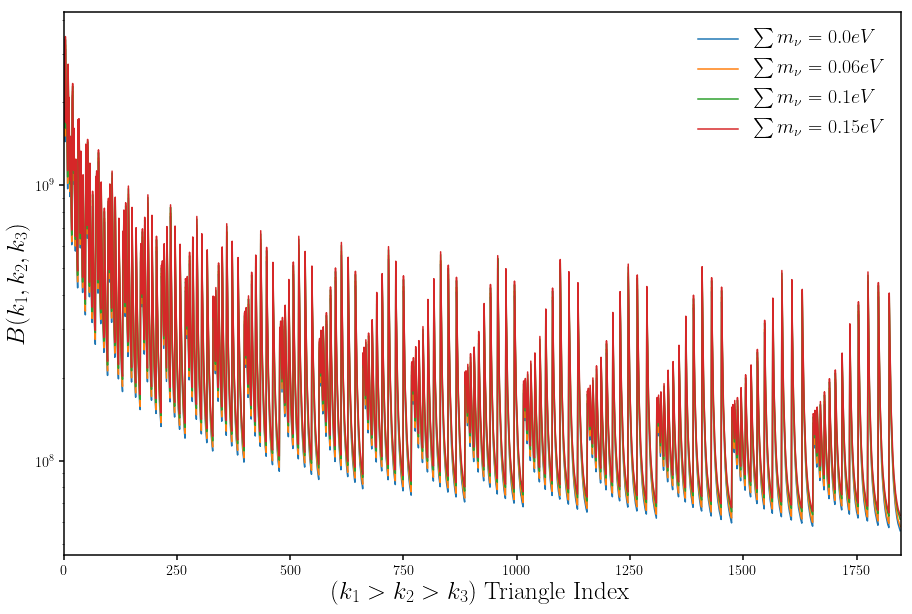

In [32]:
fig = plt.figure(figsize=(15,10))
sub = fig.add_subplot(111)
for i, mneut in enumerate([0.0, 0.06, 0.1, 0.15]): 
    i_k, j_k, l_k, BQ123, cnts = readB123(mneut, nreals, 4, BorQ='B')
    sub.plot(range(np.sum(klim)), BQ123[klim], c='C'+str(i), label=r'$\sum m_\nu ='+str(mneut)+'eV$')
sub.set_xlabel('$(k_1 > k_2 > k_3)$ Triangle Index', fontsize=25)
sub.set_xlim([0, np.sum(klim)])
sub.set_ylabel('$B(k_1, k_2, k_3)$', fontsize=25)
sub.set_yscale('log')
#sub.set_ylim([1e7, 8e9])
sub.legend(loc='upper right', markerscale=10, fontsize=20)

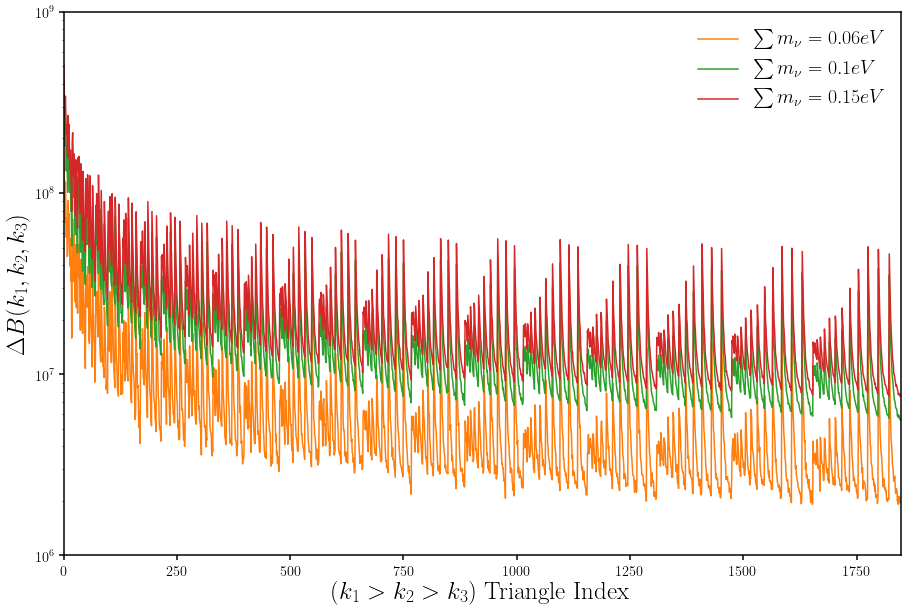

In [33]:
fig = plt.figure(figsize=(15,10))
sub = fig.add_subplot(111)
for i, mneut in enumerate([0.0, 0.06, 0.1, 0.15]): 
    i_k, j_k, l_k, BQ123, cnts = readB123(mneut, nreals, 4, BorQ='B')
    if i > 0:
        sub.plot(range(np.sum(klim)), BQ123[klim] - BQ123_0[klim], c='C'+str(i), label=r'$\sum m_\nu ='+str(mneut)+'eV$')
sub.set_xlabel('$(k_1 > k_2 > k_3)$ Triangle Index', fontsize=25)
sub.set_xlim([0, np.sum(klim)])
sub.set_ylabel('$\Delta B(k_1, k_2, k_3)$', fontsize=25)
sub.set_yscale('log')
sub.set_ylim([1e6, 1e9])
sub.legend(loc='upper right', markerscale=10, fontsize=20)

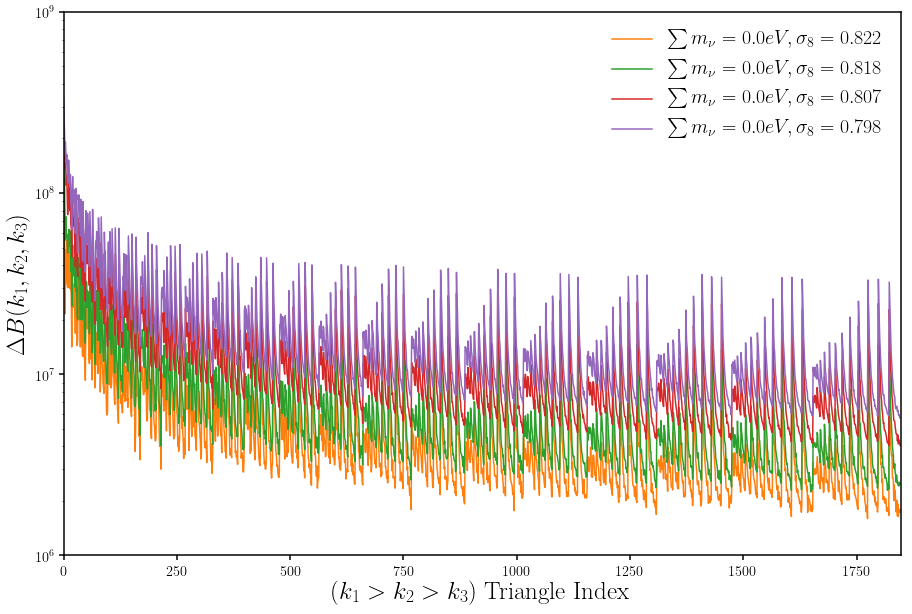

In [34]:
fig = plt.figure(figsize=(15,10))
sub = fig.add_subplot(111)
for i, sig8 in enumerate([None, 0.822, 0.818, 0.807, 0.798]): 
    if i > 0: 
        i_k, j_k, l_k, BQ123, cnts = readB123_sigma8(sig8, nreals, 4, BorQ='B')
        sub.plot(range(np.sum(klim)), BQ123[klim] - BQ123_0[klim], c='C'+str(i), label=r'$\sum m_\nu = 0.0 eV, \sigma_8='+str(sig8)+'$')
sub.set_xlabel('$(k_1 > k_2 > k_3)$ Triangle Index', fontsize=25)
sub.set_xlim([0, np.sum(klim)])
sub.set_ylabel('$\Delta B(k_1, k_2, k_3)$', fontsize=25)
sub.set_yscale('log')
sub.set_ylim([1e6, 1e9])
sub.legend(loc='upper right', markerscale=10, fontsize=20)

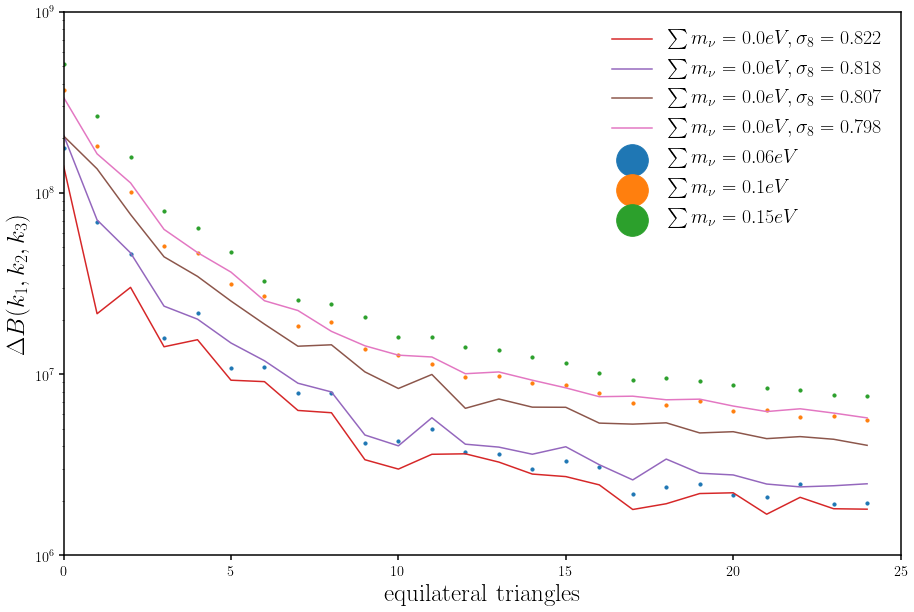

In [35]:
fig = plt.figure(figsize=(15,10))
sub = fig.add_subplot(111)

i_k, j_k, l_k, BQ123, cnts = readB123(0.0, nreals, 4, BorQ='B')
equi = ((i_k == j_k) & (j_k == l_k)) & klim
BQ123_0 = BQ123

for i, mneut in enumerate([0.06, 0.1, 0.15]): 
    i_k, j_k, l_k, BQ123, cnts = readB123(mneut, nreals, 4, BorQ='B')
    sub.scatter(range(np.sum(equi)), (BQ123 - BQ123_0)[equi], c='C'+str(i), s=10, label=r'$\sum m_\nu ='+str(mneut)+'eV$')

for i, sig8 in enumerate([0.822, 0.818, 0.807, 0.798]): 
    i_k, j_k, l_k, BQ123, cnts = readB123_sigma8(sig8, nreals, 4, BorQ='B')
    sub.plot(range(np.sum(equi)), (BQ123 - BQ123_0)[equi], c='C'+str(i+3), ls='-', label=r'$\sum m_\nu = 0.0 eV, \sigma_8='+str(sig8)+'$')
sub.set_xlabel('equilateral triangles', fontsize=25)
sub.set_xlim([0, np.sum(equi)])
sub.set_ylabel('$\Delta B(k_1, k_2, k_3)$', fontsize=25)
sub.set_yscale('log')
sub.set_ylim([1e6, 1e9])
sub.legend(loc='upper right', markerscale=10, fontsize=20)

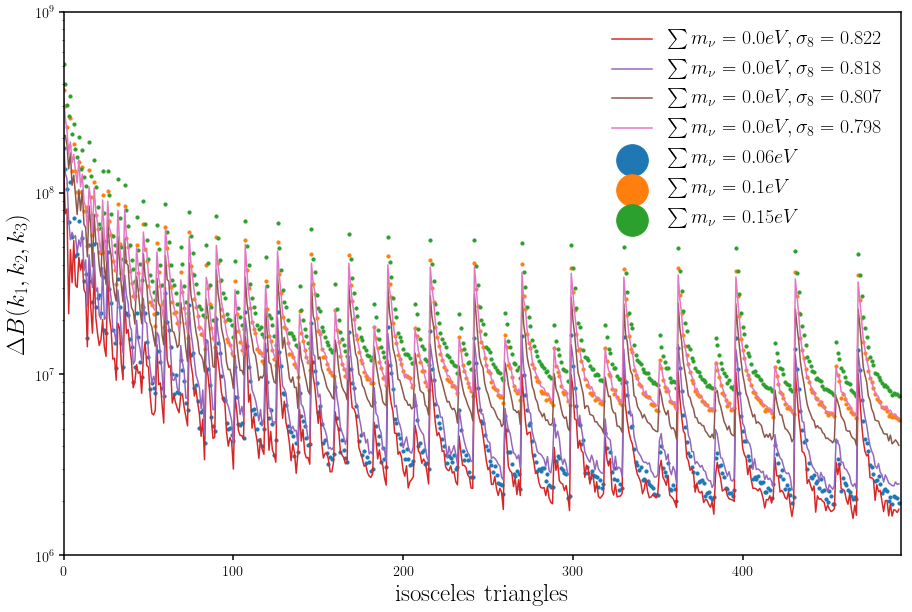

In [36]:
fig = plt.figure(figsize=(15,10))
sub = fig.add_subplot(111)

isos = ((i_k == j_k) | (j_k == l_k) | (l_k == i_k)) & klim

for i, mneut in enumerate([0.06, 0.1, 0.15]): 
    i_k, j_k, l_k, BQ123, cnts = readB123(mneut, nreals, 4, BorQ='B')
    sub.scatter(range(np.sum(isos)), (BQ123 - BQ123_0)[isos], c='C'+str(i), s=10, label=r'$\sum m_\nu ='+str(mneut)+'eV$')

for i, sig8 in enumerate([0.822, 0.818, 0.807, 0.798]): 
    i_k, j_k, l_k, BQ123, cnts = readB123_sigma8(sig8, nreals, 4, BorQ='B')
    sub.plot(range(np.sum(isos)), (BQ123 - BQ123_0)[isos], c='C'+str(i+3), ls='-', label=r'$\sum m_\nu = 0.0 eV, \sigma_8='+str(sig8)+'$')
sub.set_xlabel('isosceles triangles', fontsize=25)
sub.set_xlim([0, np.sum(isos)])
sub.set_ylabel('$\Delta B(k_1, k_2, k_3)$', fontsize=25)
sub.set_yscale('log')
sub.set_ylim([1e6, 1e9])
sub.legend(loc='upper right', markerscale=10, fontsize=20)

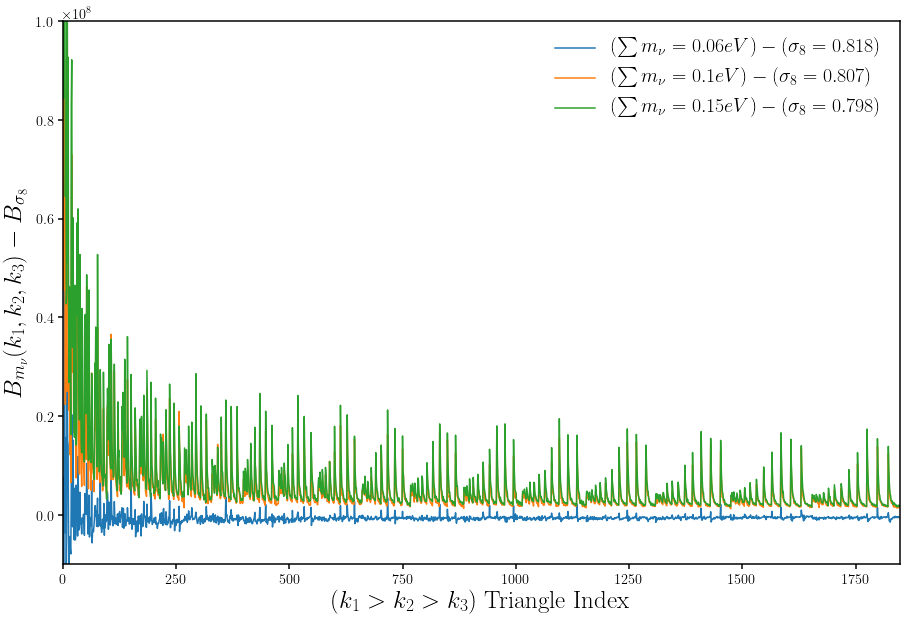

In [37]:
fig = plt.figure(figsize=(15,10))
sub = fig.add_subplot(111)
for i, mneut, sig8 in zip(range(4), [0.06, 0.1, 0.15], [0.818, 0.807, 0.798]): #0.822, 
    i_k, j_k, l_k, dBQ123, cnts = dB123_mneut(mneut, sig8, nreals, 4, BorQ='B')

    sub.plot(range(np.sum(klim)), dBQ123[klim], c='C'+str(i), 
                label=r'$(\sum m_\nu ='+str(mneut)+'eV) - (\sigma_8 = '+str(sig8)+')$')
sub.set_xlabel('$(k_1 > k_2 > k_3)$ Triangle Index', fontsize=25)
sub.set_xlim([0, np.sum(klim)])
sub.set_ylabel(r'$B_{m_\nu}(k_1, k_2, k_3) - B_{\sigma_8}$', fontsize=25)
sub.set_ylim([-1e7, 1e8])
sub.legend(loc='upper right', markerscale=10, fontsize=20)